In [1]:
# import packages
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
fileAddress = r"D:\Dropbox\Dropbox\Teaching\Urban_Data_Analsysis\Fall2021\Data\Census_Tracts.csv"

In [3]:
df = pd.read_csv(fileAddress)

In [4]:
df.sample(2)

,GISJOIN,Population2000,NH_White_2000,NH_Black_2000,Asian_2000,Hispanic_2000,Other_2000,Pct_NH_White_2000,Pct_NH_Black_2000,Pct_NH_Asian_2000,...,Pct_VacantHousing_1216,PCT_HsngUnitsOver30Year_1216,Pct_HsngUnitsOver30Year_0610,Pct_HsngUnitsMultiUnit_1216,Pct_HsngUnitsMultiUnit_0610,PopulationDensity2000,PopulationDensity0610,PopulationDensity1216,Borough_Name,HeatVulIndex
993,G3600470013500,2830,1608.0,334.0,122.0,725.0,41.0,56.819788,11.80212,4.310954,...,6.707692,78.15385,84.84092,88.24615,92.82595,75.412337,92.360128,95.771004,Brooklyn,2
1800,G3600810097202,3270,22.0,2710.0,6.0,505.0,27.0,0.672783,82.874618,0.183486,...,14.7737,86.16567,81.42982,99.57301,99.12816,25.370073,19.791760,22.390835,Queens,3


In [5]:
df.info()
#df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2147 entries, 0 to 2146
Data columns (total 99 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   GISJOIN                           2147 non-null   object 
 1   Population2000                    2147 non-null   int64  
 2   NH_White_2000                     2147 non-null   float64
 3   NH_Black_2000                     2147 non-null   float64
 4   Asian_2000                        2147 non-null   float64
 5   Hispanic_2000                     2147 non-null   float64
 6   Other_2000                        2147 non-null   float64
 7   Pct_NH_White_2000                 2147 non-null   object 
 8   Pct_NH_Black_2000                 2147 non-null   object 
 9   Pct_NH_Asian_2000                 2147 non-null   object 
 10  Pct_Hispanic_2000                 2147 non-null   object 
 11  Pct_Other_2000                    2147 non-null   object 
 12  Pct_Et

# Troubleshooting
### There are a number of issues that can cause prblems. Here are somem examples of potential problesm:
1. the column is supposed to be a numeric type but it is not. It might be object type, or string.
2. The column has 0 values but in fact those values shold be Nan 
3. The column has missing values as Nan
4. The column has inf values

### Now let's lean how to deal with those problems
1. if the column is not numerical, you can convert it. For example, in this data, MedianHsHldIncome_1216 is supposted to be numerical but it is not.

In [6]:
df['MedianHsHldIncome_1216'].dtype

dtype('O')

<AxesSubplot:xlabel='MedianHsHldIncome_1216', ylabel='Count'>

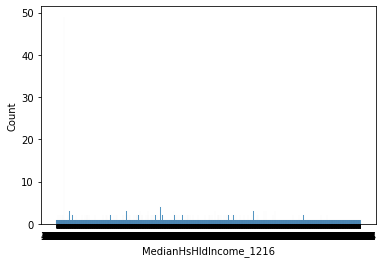

In [7]:
# this histogram doesn't work because the column is not numerical
sns.histplot(data=df,x ='MedianHsHldIncome_1216',bins=50)

In [22]:
# this function converts the column to numerical and replaces the old column. You can create a new column if you don't want to replace. 
df['MedianHsHldIncome_1216'] = pd.to_numeric(df['MedianHsHldIncome_1216'], errors='coerce')
df['MedGrossRentt_1216'] = pd.to_numeric(df['MedGrossRentt_1216'], errors='coerce')


In [9]:
# now the type is float. 
(df['MedianHsHldIncome_1216']).dtype

dtype('float64')

<AxesSubplot:xlabel='MedianHsHldIncome_1216', ylabel='Count'>

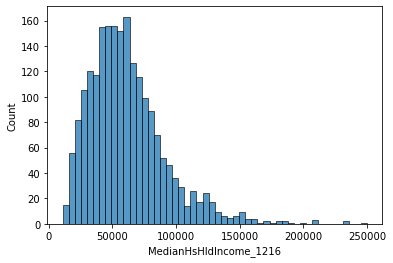

In [10]:
# and the histogram also works
sns.histplot(data=df,x ='MedianHsHldIncome_1216',bins=50)

2. there are zeros and we need to make them null or eliminate them. One way is creating a subset without zeros and the second method is replacing them with nan. Your data may have also inf or -inf values. This sample code will change that

In [14]:
# check if you have 0 values
df.loc[(df['MedianHsHldIncome_1216']==0)]

,GISJOIN,Population2000,NH_White_2000,NH_Black_2000,Asian_2000,Hispanic_2000,Other_2000,Pct_NH_White_2000,Pct_NH_Black_2000,Pct_NH_Asian_2000,...,Pct_VacantHousing_1216,PCT_HsngUnitsOver30Year_1216,Pct_HsngUnitsOver30Year_0610,Pct_HsngUnitsMultiUnit_1216,Pct_HsngUnitsMultiUnit_0610,PopulationDensity2000,PopulationDensity0610,PopulationDensity1216,Borough_Name,HeatVulIndex


In [13]:
# in this line, we have a list of vlaues that will be replaced with the second argument (np.nan). 
df['MedianHsHldIncome_1216'].replace([0, np.inf, -np.inf], np.nan, inplace=True)

In [15]:
dfSub = df[['MedianHsHldIncome_1216','EthincMinority_1216']]

In [16]:
dfSub.sample(2)

,MedianHsHldIncome_1216,EthincMinority_1216
102,71375.0,563
2024,19879.0,5583


In [17]:
dfSub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2147 entries, 0 to 2146
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MedianHsHldIncome_1216  2098 non-null   float64
 1   EthincMinority_1216     2147 non-null   int64  
dtypes: float64(1), int64(1)
memory usage: 33.7 KB


In [18]:
# axis 0 means delete the rows that contain nan. 
dfSubCopy = dfSub.dropna(axis=0)
# how{‘any’, ‘all’}, default ‘any’
# dfSubCopy = dfSub.dropna(axis=0,how='all')

In [19]:
dfSubCopy.sample(2)

,MedianHsHldIncome_1216,EthincMinority_1216
1806,67039.0,483
1758,94389.0,964


In [23]:
df['MedGrossRentt_1216'].dtype

dtype('float64')

In [24]:
df['rentBurden_1216'] = (df['MedGrossRentt_1216']*12)/df['MedianHsHldIncome_1216']

In [ ]:
# df['rentBurden_1216'] = (df['MedianRent_1216']*12)/df['MedHHIncome_1216'] # this code does not work because there are some income values as 0 and any number / 0 is inf.
# we can use this code instead
# 'col_to_write' can be a new column or an existing one that you want to rewrite
# Condition limits the rows that need to be written. for example: df['a_col'] > number
# value can be a number or a fromula that uses the columns of the df
# syntax: df.loc[(condition),'col_to_write'] = value
df.loc[(df['MedianHsHldIncome_1216']>0),'rentBurden_1216'] = (df['MedGrossRentt_1216']*12)/df['MedianHsHldIncome_1216']